# P5 - Monte Carlo Simulation

In [1]:
import numpy as np

Consider the unit disk in 2 dimensions: $$ D = \left\{ (x,y) \in \mathbb{R}^2, \ x^2 + y^2 \leq 1 \right\} $$

The area of the disk is $A = r^2 \pi = \pi$. We can estimate this area using a **Monte Carlo** simulation.

First, let's plot a quarter of the unit disk, which has area $A/4$.

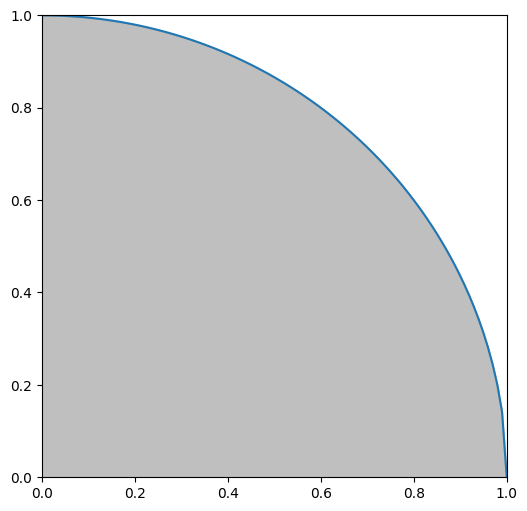

In [2]:
from matplotlib import pyplot as plt

x = np.linspace(0., 1., 100)
y = np.sqrt(1 - x**2)

plt.figure(figsize=(6, 6))
plt.plot(x, y)
# shade area under curve
plt.fill_between(x, y, color='gray', alpha=0.5)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

## Approach 1

For $x \in [0,1]$, we have 
$$ x^2 + y^2 = 1 \ \Leftrightarrow \ y = \sqrt{1 - x^2}$$

Thus, for $x \in [0,1]$ the circle is just a function $f: [0,1] \to \mathbb{R}$ given by $$ f(x) = \sqrt{1 - x^2} $$

Clearly, $$ \frac{A}{4} = \int_{0}^{1} f(x) \ dx$$

If we could write this as an *expectation* w.r.t. a density we can easily sample from, we could use Monte Carlo simulation to estimate this quantity!

**Important**: Our probability distribution $p$ must satisfy that $p(x) > 0$ whenever $f(x) \neq 0$.

Let $$p(x) = \begin{cases} 1 & x \in [0,1] \\ 0 & \text{otherwise} \end{cases}$$

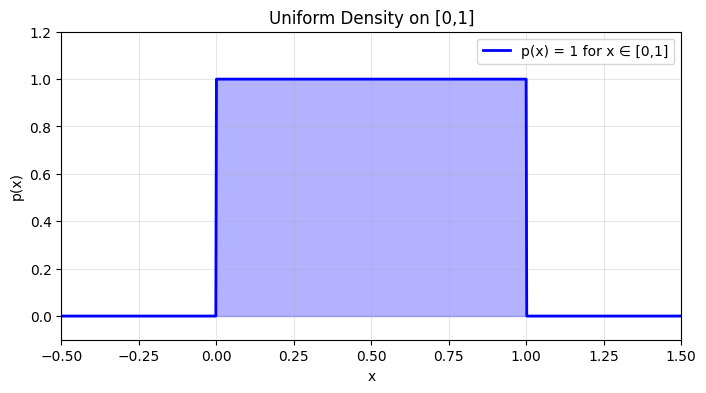

In [5]:
# Plot the uniform density on [0,1]
x_uniform = np.linspace(-0.5, 1.5, 1000)
p_uniform = np.where((x_uniform >= 0) & (x_uniform <= 1), 1, 0)

plt.figure(figsize=(8, 4))
plt.plot(x_uniform, p_uniform, 'b-', linewidth=2, label='p(x) = 1 for x ∈ [0,1]')
plt.fill_between(x_uniform, p_uniform, alpha=0.3, color='blue')
plt.xlim(-0.5, 1.5)
plt.ylim(-0.1, 1.2)
plt.xlabel('x')
plt.ylabel('p(x)')
plt.title('Uniform Density on [0,1]')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

Then, we have $$ \frac{A}{4} = \int_{0}^{1} f(x) \ dx = \int_{-\infty}^{\infty} f(x) \ p(x) \ dx = \mathbb{E}_{x \sim p(x)} \left[ f(x) \right] $$

And since $p(x)$ is just the uniform distribution on $[0,1]$, we can sample from it easily!

Thus, the Monte Carlo estimate is $$\hat{\mathbb{E}}_N^{(1)} = \frac{1}{N} \sum_{i=1}^{N} f(x_i) \approx \frac{A}{4}$$ where $x_i \sim p$ are i.i.d. samples.

In [19]:
def f(x):
    return np.sqrt(1 - x**2)

def pi_monte_carlo_estimate_1(num_samples, rng, repeats=1):
    x_i = rng.uniform(low=0, high=1, size=(repeats, num_samples))
    return 4 * np.mean(f(x_i), axis=1)

In [31]:
def plot_mc_estimates(num_samples_list, estimate_func, repeats, title, seed=1234):
    estimates = []
    mean_estimates = []
    var_estimates = []

    rng = np.random.default_rng(seed)
    for num_samples in num_samples_list:
        estimate = estimate_func(num_samples, rng, repeats=repeats)
        estimates.append(estimate)

        if repeats > 1:
            mean_estimate = np.mean(estimate)
            var_estimate = np.var(estimate)
            mean_estimates.append(mean_estimate)
            var_estimates.append(var_estimate)


    plt.figure(figsize=(10, 6))
    if repeats > 1:
        plt.scatter(num_samples_list, mean_estimates, color='blue', s=50, alpha=0.7, label='Mean MC Estimates')
        std_estimates = np.sqrt(var_estimates)
        plt.fill_between(num_samples_list, 
                        np.array(mean_estimates) - 2*std_estimates, 
                        np.array(mean_estimates) + 2*std_estimates, 
                        alpha=0.3, color='red', label='±2σ')
    else:
        plt.scatter(num_samples_list, estimates, color='red', s=50, alpha=0.7, label='MC Estimates')

    plt.axhline(y=np.pi, color='blue', linestyle='--', linewidth=2, label=f'True π = {np.pi:.6f}')
    plt.xscale('log')
    plt.xlabel('Number of Samples (N)')
    plt.ylabel('MC Estimate')
    plt.title(title)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()

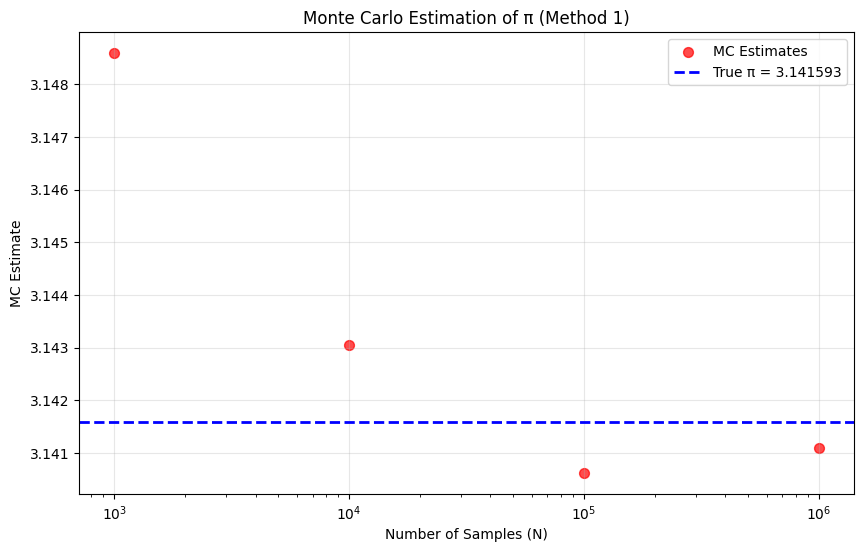

In [32]:
plot_mc_estimates(num_samples_list=[1000, 10_000, 100_000, 1_000_000], 
                  estimate_func=pi_monte_carlo_estimate_1, 
                  repeats=1,
                  title='Monte Carlo Estimation of π (Method 1)')

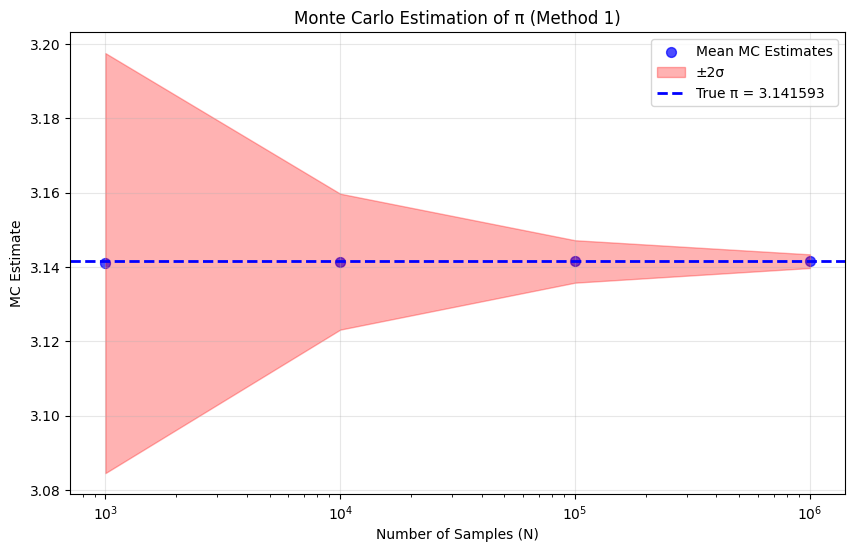

In [33]:
plot_mc_estimates(num_samples_list=[1000, 10_000, 100_000, 1_000_000], 
                  estimate_func=pi_monte_carlo_estimate_1, 
                  repeats=1000,
                  title='Monte Carlo Estimation of π (Method 1)')

## Approach 2

We can also write $A/4$ as a double integral:

$$ \frac{A}{4} = \int_0^1 \int_0^1 \mathbf{1} \left[ x^2 + y^2 \leq 1 \right] \, dx \, dy $$

where $\mathbf{1}[\cdot]$ denotes the indicator function.

That is, we integrate over the unit square and only count the points that are inside the unit disk.

We define 

$$p(x,y) = \begin{cases} 1 & \text{if } x \in [0,1] \text{ and } y \in [0,1] \\ 0 & \text{otherwise} \end{cases}$$

which is the uniform distribution on the unit square.

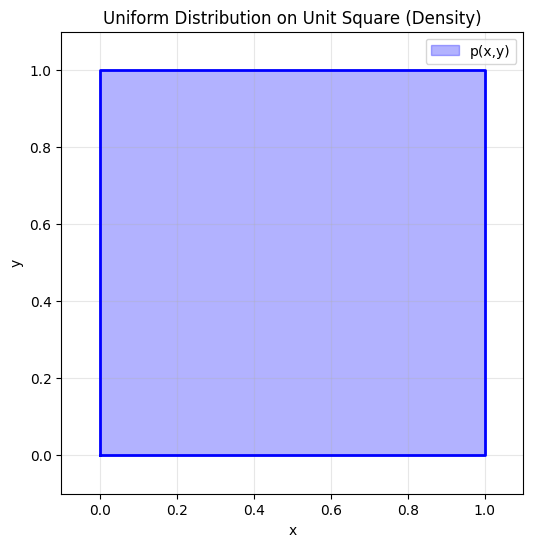

In [53]:
# Visualize the uniform distribution on the unit square (density view)
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

# Draw the unit square boundary and fill it
square_x = [0, 1, 1, 0, 0]
square_y = [0, 0, 1, 1, 0]
ax.fill(square_x, square_y, color='blue', alpha=0.3, label='p(x,y)')
ax.plot(square_x, square_y, 'b-', linewidth=2)

ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Uniform Distribution on Unit Square (Density)')
ax.grid(True, alpha=0.3)
ax.legend()
ax.set_aspect('equal')
plt.show()


With $g(x,y) = \mathbf{1} \left[ x^2 + y^2 \leq 1 \right]$, we have

$$ \frac{A}{4} = \int_0^1 \int_0^1 g(x,y) \, dx \, dy = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} g(x,y) \, p(x,y) \, dx \, dy = \mathbb{E}_{(x,y) \sim p(x,y)} \left[ g(x,y) \right] $$

Thus, the Monte Carlo estimate is $$\hat{\mathbb{E}}_N^{(2)} = \frac{1}{N} \sum_{i=1}^{N} g(x_i, y_i) \approx \frac{A}{4}$$ where $(x_i, y_i) \sim p$  are i.i.d. samples.


In [35]:
def g(x, y):
    return (x**2 + y**2 <= 1).astype(float)

def pi_monte_carlo_estimate_2(num_samples, rng, repeats=1):
    x_i = rng.uniform(low=0, high=1, size=(repeats, num_samples))
    y_i = rng.uniform(low=0, high=1, size=(repeats, num_samples))

    return 4 * np.mean(g(x_i, y_i), axis=1)

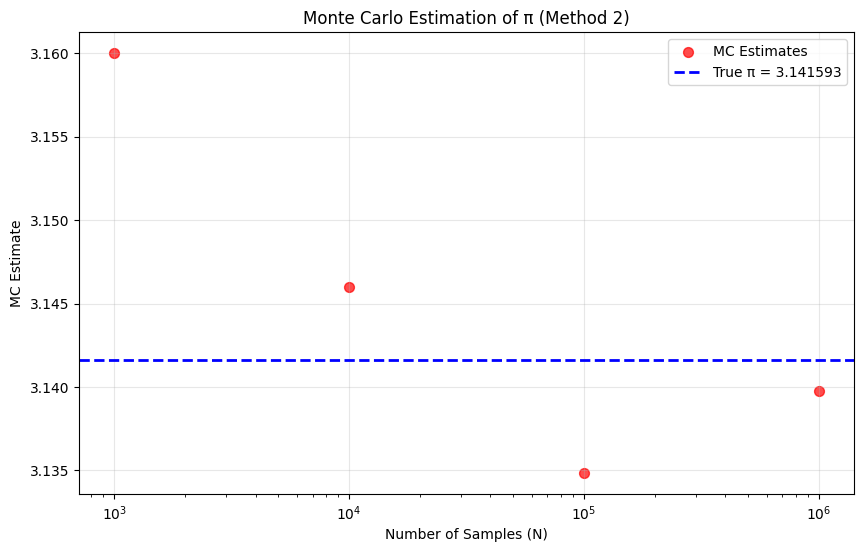

In [36]:
plot_mc_estimates(num_samples_list=[1000, 10_000, 100_000, 1_000_000], 
                  estimate_func=pi_monte_carlo_estimate_2, 
                  repeats=1,
                  title='Monte Carlo Estimation of π (Method 2)')

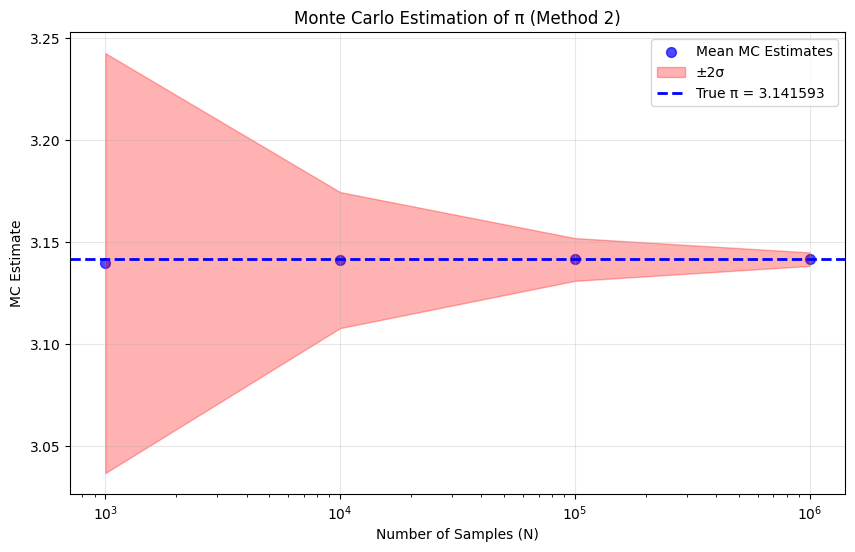

In [37]:
plot_mc_estimates(num_samples_list=[1000, 10_000, 100_000, 1_000_000], 
                  estimate_func=pi_monte_carlo_estimate_2, 
                  repeats=1000,
                  title='Monte Carlo Estimation of π (Method 2)')

## Numerical Integration

In [65]:
# Compare with scipy.integrate.quad for Method 1
from scipy.integrate import quad

# Compute the integral using scipy.integrate.quad
integral_result, error, infodict = quad(f, 0, 1, full_output=True)

print(f"Method 1 - Analytical integration using scipy.integrate.quad:")
print(f"π estimate: {4 * integral_result:.15f}")
print(f"Actual π: {np.pi:.15f}")
print(f"Integration error: {4 * error:.2e}")
print(f"Difference from π: {abs(4 * integral_result - np.pi):.2e}")
print('-'*40)
print(f"Number of function evaluations: {infodict['neval']}")

Method 1 - Analytical integration using scipy.integrate.quad:
π estimate: 3.141592653589792
Actual π: 3.141592653589793
Integration error: 3.53e-10
Difference from π: 8.88e-16
----------------------------------------
Number of function evaluations: 231
